# MURCHIE85 TWITTER PROCESSING 

&#x1F34E; **TOPIC = "Immigration"**


## AUTOMATED RESEARCH SUMMARY
    

![image](https://i.dailymail.co.uk/i/pix/2017/05/20/00/035B04BB000003E8-0-image-a-6_1495235383029.jpg)

<br></br>

<div class="alert alert-block alert-danger"><b> This repo is for pulling metrics on a given keyword or hashtag and performs a series of reporting and analysis.</b>
</div>

<br>

   
![image](TWEETS.png)

<br></br>

|                ** Sample-Tweets  **        |
| :-------------: |
| <div class="alert alert-block alert-warning">RT @MaximeBernier: Listen to my interview with Evan Solomon (at 11 min.) We’re discussing immigration, PPC candidates and abortion.</div><div class="alert alert-block alert-success">Bolton and Israel lobby will end up pushing @realDonaldTrump into war, especially when he sees that he can't win th… https://t.co/dGrDTCbhH0</div> <div class="alert alert-block alert-info">RT @mitchellvii: Can I just laugh at those on the right and the left saying Trump's tariffs against Mexico are a "bad idea?" Oh no, Mexico…</div>     | 

<br></br>




## GOOGLE SEARCH DEMOGRAPHICS 

Tweeting demographic           | Countries
:-------------------------:|:-------------------------:
![](maps.png)  |  ![](gcompare.png)
<br>



## RELATED TOPICS  & QUERIES 

topics          | searches
:-------------------------:|:-------------------------:
![](topic.png)  |  ![](query.png)


<br>
<br>




## RELATED METRICS
<br>




| Metric | Value |
| ------------- | ------------- |
| #1 Most tweeted to  | **realDonaldTrump** |
| #2 Most tweeted to  | **mitchellvii**|
| #3 Most tweeted to  | **RVAwonk** |
| NewProfiles (less than 10 days) | 0.95%  |
| Tweeters with < 100 followers  | 3.81%|
| Tweeters with > 100k followers  | 0.09%  |



<br>

## MOST POPULAR TWEET TERMS 




| Popularity Rank  | Term |
| ------------- | ------------- |
| first  | **MEXICO**  |
| second  | **TRUMP**  |
| third  | **TARIFFS** |
| fourth  | **US**  |
| fifth  | **PRESIDENT**  |



<br>

![image](comparetweets.png)


## Twitter Bio Analysis

![image](BIO.png)










    
### SENTIMENT ANALYSIS
VIEWS WERE : **SUBJECTIVE**  (30%) & **NEGATIVELY-SUBJECTIVE** (10%) **OBJECTIVE** (60%)



### TWEET SAMPLE 

Random value picked from array: 


<div class="alert alert-block alert-info">"RT @realDonaldTrump: On June 10th, the United States will impose a 5% Tariff on all goods coming into our Country from Mexico, until such t…"</div>

### MOST RETWEETED

<div class="alert alert-block alert-danger">JackDeskins RT @adamcbest: Conservatives on abortion: We want a ban!, Conservatives on gay marriage: We want a ban!, Conservatives on immigration: We w…</div>

### CONCLUSION & EXTERNAL ANALYSIS

*This is my (Adam McMurchie's) opinion on the data from the tweets, it serves as no objective truth.Since the tweets themselves are a mixture of fact & opinion. 

<br>

Authors analytical summary on request.


<br><br>

**RECOMMENDATIONS** WILL BE UPDATED IN NEXT  24 HOURS 


<br>

# TECHNICAL WALKTHROUGH 


## OVERVIEW

**SKIP TO BOTTOM FOR FULL RESULTS & GRAPH BREAKDOWN **

- Pulls live tweets from all over twitter 
- Imports Tweepy Library 
- Consumes Twitter API 
- Desgined to be keyword driven
- All metrics can be captured
- No limit on Runtime (best to terminate when you want)

## Limitations & info
1. LOCATION filter is tricky
2. Streaming connects to the “public streams” (all public data) 
3. This is data provided by the Twitter API which accesses their database, the maintenence of DB and thus data quality is managed by Twitter

Example of parameter setting done in stream filter 

```
stream.filter(follow=["2211149702"])
```


### AUTHOR : ADAM MCMURCHIE 

![image](https://s3.amazonaws.com/re-work-production/avatars/1104/original.png?1485507466)

Github [here](https://github.com/murchie85)  

Mysite [here](https://murchie85.github.io/)

# AUTHENTICATION

You will need to change f variable to point to your credentials file, I save mines in a text file and split the comma. Not uploaded to this repo obviously.

In [1]:
import datetime
import os
from ipywidgets import IntProgress
from IPython.display import display
from IPython.display import clear_output
import time
import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy




f = open("../donotgit/access.txt", "r")
keys = f.read()
f.close()
keys  = keys.split(',')
#print("Access Keys are : " + str(keys))
ACCESS_TOKEN = keys[0]
ACCESS_SECRET = keys[1]


f = open("../donotgit/consumer.txt", "r")
keys = f.read()
keys  = keys.split(',')
#print("Consumer Keys are : " + str(keys))
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]


# TOPIC & SCANTYPE SELECTION

1. Select which topic you wish to scan for (You can use # or most special characters). 
2. Scantype means you can chose between pulling in tweets as they happen or pull down historical tweets so you can view things like number of retweets (as if it is realtime, there wont have been time for retweet)

In [2]:
TOPIC = 'immigration'

# Realtime = 1 Historical = 2
scantype = 2

# PULLING DOWN THE DATA 

This is where the magic happens, api authentication is set up, tweepy library is imported for the work and a class allow us to pull live data. This is appended to array for processing later. 


*NOTE* -   this will just keep running until you force terminate, i haven't added in a terminate loop yet.

# REALTIME TWEETS

In [3]:
if scantype != 1:
    print("Ignore this error = jump to next")
    raise


# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

status_array = []

progress = 0
max_count = 10000

f = IntProgress(description='Processing:',min=0, max=max_count,) # instantiate the bar
display(f) # display the bar




class StreamListener(tweepy.StreamListener):
    tweet_number=0   # class variable
    


    def on_status(self, status):
        self.max_tweets=max_count # max number of tweets
        self.tweet_number+=1   
        f.value += 1 # signal to increment the progress bar
        progress = (f.value/max_count) * 100
        progress = format(progress, '.2f')
        print('Progress: ' + str(progress) + " %")
        clear_output(wait=True)
        status_array.append(status._json)

        if self.tweet_number>=self.max_tweets:
            sys.exit('PROCESSING COMPLETE : '+str(self.max_tweets)+' tweets processed.')

        
    def on_error(self, status_code):
        if status_code == 420:
            return False

stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)

#print('Pulling down data.....')
stream.filter(track=[TOPIC],languages=["en"])




Ignore this error = jump to next


RuntimeError: No active exception to reraise

# HISTORICAL TWEETS

In [4]:
# HISTORICAL DATA SWITCHED OFF (IF YOU SWITCH ON, THEN SWITCH STREAM OFF ABOVE)

if scantype != 2:
    raise


# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)









status_array = []
LOOP_COUNT = 0
max_count = 10000


# ------ENTER YOUR SERACH TERM HER E--------
tweets = tweepy.Cursor(api.search, q=TOPIC, count=int(max_count))

# TRACK PROGRESS
f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar
progress = 0

print('Pulling down data.....')                    
for tweet in tweets.items(int(max_count)):
    f.value+=1 # signal to increment the progress bar
    progress = (f.value/max_count) * 100
    progress = format(progress, '.2f')
    print('Progress: ' + str(progress) + " %")
    clear_output(wait=True)
    time.sleep(.1)
    status_array.append(tweet._json)



print('Processing complete')



KeyboardInterrupt: 

# QUICK STREAM

In [5]:
print('Number of records')
print(len(status_array))
print('')
print('The data keys are : ')
print(status_array[0].keys())
print('')
#print('An example element looks like: ')
#print(status_array[0])

Number of records
217

The data keys are : 
dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])



# REPORT GENERATION

**REMOVE** quotes to switch on reporting, you may need to create the folders listed below i.e. data folder description folder etc.

In [6]:
# REMOVE QUOTES TO ACTIVATE 
# append to filename
"""
currentDT = datetime.datetime.now()
filename = "data/streamout-" + str(currentDT) + ".txt"

print(filename)

with open(filename, 'w') as f:
    for item in status_array:
        f.write("%s\n" % item)
f.close()


# WRITE OUT FULL REPORT
reportfile = "reports/printout-"+ str(currentDT) + ".txt"
descriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"
tweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"

REPORTCOUNT = 0
with open(reportfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('------------------------------\n')
        f.write(status_array[y]['created_at'])
        f.write('------------------------------\n')
        f.write(status_array[y]['user']['name'])
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['location']))
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('--------------REPLY COUNT----------------\n|')
        f.write(str(status_array[y]['reply_count']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------RETWEETED?----------------\n')
        f.write(str(status_array[y]['retweeted']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------FAVOURITED----------------\n')
        f.write(str(status_array[y]['favorited']))
        f.write('--------------FAVOURITE COUNT----------------\n')
        f.write(str(status_array[y]['favorite_count']))
        f.write('\n')
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    
    
# WRITE OUT ONLY DESCRIPTION
    
REPORTCOUNT = 0
with open(descriptionfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    

# WRITE OUT ONLY TWEET
    
REPORTCOUNT = 0
with open(tweetfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()

    
    
    
    
    
print('=========================SAMPLE OUTPUT================================')
print('************************************************************')
print(status_array[0]['text'])
print('------------------------------')
print(status_array[0]['created_at'])
print('------------------------------')
print(status_array[0]['user']['name'])
print('------------------------------')
print(status_array[0]['user']['location'])
print('------------------------------')
print(status_array[0]['user']['description'])
print('--------------REPLY COUNT----------------')
print(status_array[0]['reply_count'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------RETWEETED?----------------') 
print(status_array[0]['retweeted'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------FAVOURITED----------------')
print(status_array[0]['favorited'])
print('--------------FAVOURITE COUNT----------------')
print(status_array[0]['favorite_count'])
"""


'\ncurrentDT = datetime.datetime.now()\nfilename = "data/streamout-" + str(currentDT) + ".txt"\n\nprint(filename)\n\nwith open(filename, \'w\') as f:\n    for item in status_array:\n        f.write("%s\n" % item)\nf.close()\n\n\n# WRITE OUT FULL REPORT\nreportfile = "reports/printout-"+ str(currentDT) + ".txt"\ndescriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"\ntweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"\n\nREPORTCOUNT = 0\nwith open(reportfile, \'w\') as f:\n    for y in range(0, len(status_array)):\n        REPORTCOUNT = REPORTCOUNT + 1\n        f.write(\'************************************************************\n\')\n        f.write(status_array[y][\'text\'])\n        f.write(\'------------------------------\n\')\n        f.write(status_array[y][\'created_at\'])\n        f.write(\'------------------------------\n\')\n        f.write(status_array[y][\'user\'][\'name\'])\n        f.write(\'------------------------------\n\')\n        f.write(st

## TWEET NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency,  **YOU DON'T NEED TO WORRY ABOUT CASE SENSITIVITY IN WORDING**, that is covered in the code.

```
WORDONE=''
WORDTWO=''
WORDTHREE=''
```

In [7]:
# UPDATE WITH WORDS YOU WANT TO INTERROGATE
WORDONE='MEXICO'
WORDTWO='TRUMP'
WORDTHREE='TARIFFS'
WORDFOUR = 'ILLEGAL'
WORDFIVE = 'border'
WORDSIX = 'ASYLUM'
WORDSEVEN = 'humanity'
WORDEIGHT = 'deport'
WORDNINE = 'TERM'
WORDTEN = 'TERM'




WORDONE= WORDONE.upper()
WORDTWO= WORDTWO.upper()
WORDTHREE=WORDTHREE.upper()
WORDFOUR = WORDFOUR.upper()
WORDFIVE = WORDFIVE.upper()
WORDSIX = WORDSIX.upper()
WORDSEVEN = WORDSEVEN.upper()
WORDEIGHT = WORDEIGHT.upper()
WORDNINE = WORDNINE.upper()
WORDTEN = WORDTEN.upper()






WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 
WORDFOUR_COUNT = 0
WORDFIVE_COUNT = 0
WORDSIX_COUNT = 0
WORDSEVEN_COUNT= 0
WORDEIGHT_COUNT= 0
WORDNINE_COUNT = 0
WORDTEN_COUNT = 0




linecount = 0
APPENDED_TEXT = ""



for x in range(0, len(status_array)):
    linecount = linecount + 1
    text = str(status_array[x]['text']).upper()
    APPENDED_TEXT = APPENDED_TEXT + str(text)
    
    
    if str(text).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1
    if str(text).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1
    if str(text).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
    if str(text).count(str(WORDFOUR)) >= 1:
        WORDFOUR_COUNT = WORDFOUR_COUNT + 1
    if str(text).count(str(WORDFIVE)) >= 1:
        WORDFIVE_COUNT = WORDFIVE_COUNT + 1
    if str(text).count(str(WORDSIX)) >= 1:
        WORDSIX_COUNT = WORDSIX_COUNT + 1
    if str(text).count(str(WORDSEVEN)) >= 1:
        WORDSEVEN_COUNT = WORDSEVEN_COUNT + 1
    if str(text).count(str(WORDEIGHT)) >= 1:
        WORDEIGHT_COUNT = WORDEIGHT_COUNT + 1
    if str(text).count(str(WORDNINE)) >= 1:
        WORDNINE_COUNT = WORDNINE_COUNT + 1
    if str(text).count(str(WORDTEN)) >= 1:
        WORDTEN_COUNT = WORDTEN_COUNT + 1

      
 


WORDONE_COUNT_PERCENT = round(((WORDONE_COUNT/len(status_array))*100),2)
WORDTWO_COUNT_PERCENT  = round(((WORDONE_COUNT/len(status_array))*100),2)
WORDTHREE_COUNT_PERCENT  = round(((WORDTHREE_COUNT/len(status_array))*100),2)
WORDFOUR_COUNT_PERCENT  = round(((WORDFOUR_COUNT/len(status_array))*100),2)
WORDFIVE_COUNT_PERCENT  = round(((WORDFIVE_COUNT/len(status_array))*100),2)
WORDSIX_COUNT_PERCENT  = round(((WORDSIX_COUNT/len(status_array))*100),2)
WORDSEVEN_COUNT_PERCENT  = round(((WORDSEVEN_COUNT/len(status_array))*100),2)
WORDEIGHT_COUNT_PERCENT  = round(((WORDEIGHT_COUNT/len(status_array))*100),2)
WORDNINE_COUNT_PERCENT  = round(((WORDNINE_COUNT/len(status_array))*100),2)
WORDTEN_COUNT_PERCENT  = round(((WORDTEN_COUNT/len(status_array))*100),2)
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT) + "               " + str(WORDONE_COUNT_PERCENT) + "%")
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT) + "              " + str(WORDTWO_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT) + "           " + str(WORDTHREE_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDFOUR) + ' :' + str(WORDFOUR_COUNT) + "             " + str(WORDFOUR_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDFIVE) + ' :' + str(WORDFIVE_COUNT) + "             " + str(WORDFIVE_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDSIX) + ' :' + str(WORDSIX_COUNT) + "               " + str(WORDSIX_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDSEVEN) + ' :' + str(WORDSEVEN_COUNT) + "            " + str(WORDSEVEN_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDEIGHT) + ' :' + str(WORDEIGHT_COUNT) + "           " + str(WORDEIGHT_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDNINE) + ' :' + str(WORDNINE_COUNT) + "             " + str(WORDNINE_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDTEN) + ' :' + str(WORDTEN_COUNT) + "               " + str(WORDTEN_COUNT_PERCENT)+ "%")
print('Total Number of Records: ' + str(linecount)) 


APPENDED_TEXT = APPENDED_TEXT.replace('#', '')
APPENDED_TEXT = APPENDED_TEXT.replace('.', '')
APPENDED_TEXT = APPENDED_TEXT.replace(',', '')
APPENDED_TEXT = APPENDED_TEXT.replace(',', '')



print('')

print("Length of appended text array : " + str(len(APPENDED_TEXT)))

print('')
from collections import Counter, OrderedDict
DISC = APPENDED_TEXT.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE'],x['TODAY'],x['GET'],x['WHEN'],x['COMMENT'],x['HER'],x['SHE'],x['FURTHER']
del x['HE'],x['HIS'],x['OUT'],x['HOW'],x['BECAUSE'],x['HIM'],x['WHY'],x['THINK'],x["IT'S"],x['TAKE'],x['OVER'],x[''],x[''],
del x['END'], x['ALSO'],x['SINCE'],x['END'],x['THAT'],x['UP'],x['IT’S'],x['SEE'],x['KNOW'],x['SHOULD'],x['HAD'],x['SAYS'],x['SAID'],x['DID'],x['—'],x['EVERY']
del x['YOU'],x['J'],x['WERE'],x['THERE'],x['“YOU'],x['THOSE'],x['OFTEN'],x['RIGHT']



#SPECIAL DELETE 
del x['IMMIGRATION']

large_top_tweets = OrderedDict(x.most_common(50))
top_tweets = OrderedDict(x.most_common(20))
print(top_tweets)




Total count of words - MEXICO :41               18.89%
Total count of words - TRUMP :64              18.89%
Total count of words - TARIFFS :11           5.07%
Total count of words - ILLEGAL :19             8.76%
Total count of words - BORDER :29             13.36%
Total count of words - ASYLUM :1               0.46%
Total count of words - HUMANITY :0            0.0%
Total count of words - DEPORT :1           0.46%
Total count of words - TERM :1             0.46%
Total count of words - TERM :1               0.46%
Total Number of Records: 217

Length of appended text array : 29396

OrderedDict([('DEAL', 85), ('TRUMP', 33), ('--NO', 32), ('MEXICO', 31), ('BORDER', 27), ('KIDS', 27), ('ENGLISH', 24), ('TRUMP:', 23), ('EMERGENCY', 20), ('FINANCE', 19), ('@RBREICH:', 19), ('CAMPAIGN', 17), ('NORTH', 16), ('CRISIS', 15), ('ILLEGAL', 15), ('CLASSES', 15), ('US', 14), ('POLICY', 14), ('NEW', 14), ('MUST', 13)])


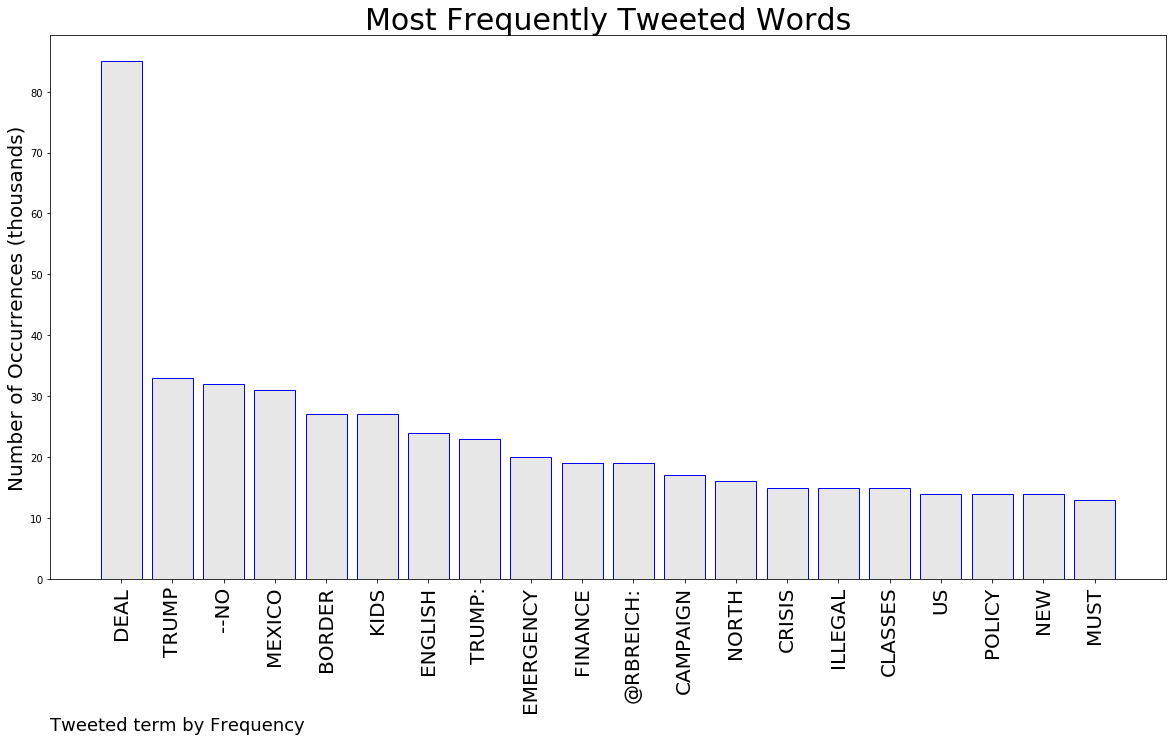

In [10]:
import os
import matplotlib.pyplot as plt

E = top_tweets
one = (0.1, 0.1, 0.1, 0.1)
two = (0.1, 0.1, 0.1, 0.1)
three = (0.1, 0.1, 0.1, 0.1)
four= (0.1, 0.1, 0.1, 0.1)
five= (0.1, 0.1, 0.1, 0.1)
six= (0.1, 0.1, 0.1, 0.1)
seven= (0.1, 0.1, 0.1, 0.1)
eight= (0.1, 0.1, 0.1, 0.1)
nine= (0.1, 0.1, 0.1, 0.1)
ten= (0.1, 0.1, 0.1, 0.1)
eleven= (0.1, 0.1, 0.1, 0.1)
twelve= (0.1, 0.1, 0.1, 0.1)
thirteen= (0.1, 0.1, 0.1, 0.1)
fourteen= (0.1, 0.1, 0.1, 0.1)
fithteen= (0.1, 0.1, 0.1, 0.1)
sixteen= (0.1, 0.1, 0.1, 0.1)
seventeen= (0.1, 0.1, 0.1, 0.1)
eighteen= (0.1, 0.1, 0.1, 0.1)
nineteen= (0.1, 0.1, 0.1, 0.1)
twenty= (0.1, 0.1, 0.1, 0.1)



color_last = [one, two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fithteen,sixteen,seventeen,eighteen,nineteen,twenty]
color = (0.1, 0.1, 0.1, 0.1)
plt.bar(range(len(E)), list(E.values()), align='center', color=color_last,  edgecolor='blue')

plt.xticks(range(len(E)), list(E.keys()), rotation='vertical', fontsize=20)
plt.title("Most Frequently Tweeted Words", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=20 )
plt.xlabel('Tweeted term by Frequency', horizontalalignment='left', position=(0,25),fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)

exists = os.path.isfile('TWEETS.png')
if exists:
    os.remove("TWEETS.png")

    
plt.savefig("TWEETS", bbox_inches="tight")
plt.show()


# TWEET COMPARISON

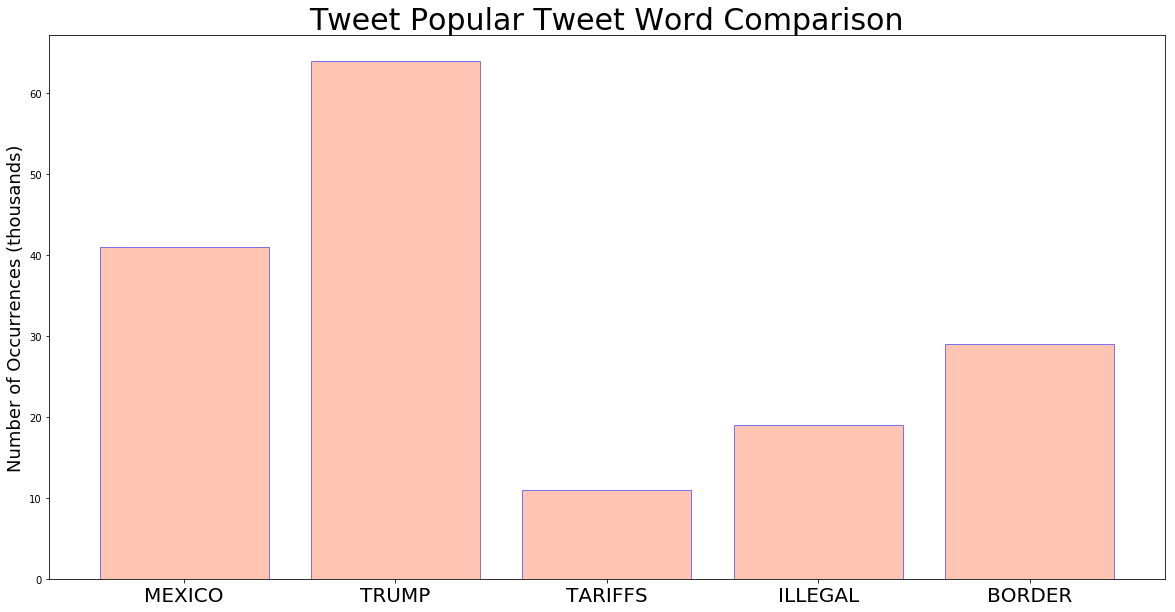

In [11]:
import matplotlib.pyplot as plt
B = {str(WORDONE):int(WORDONE_COUNT), 
     str(WORDTWO):int(WORDTWO_COUNT),
    str(WORDTHREE):int(WORDTHREE_COUNT),
    str(WORDFOUR):int(WORDFOUR_COUNT),
    str(WORDFIVE):int(WORDFIVE_COUNT)}



plt.bar(range(len(B)), list(B.values()), align='center', alpha=0.5, color=('#ff8c66'),  edgecolor='blue')

plt.xticks(range(len(B)), list(B.keys()), rotation='horizontal', fontsize=20)
plt.title("Tweet Popular Tweet Word Comparison", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
#plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
#plt.savefig("BESPOKE", bbox_inches="tight")


exists = os.path.isfile('comparetweets.png')
if exists:
    os.remove("comparetweets.png")

    
plt.savefig("comparetweets")
plt.show()

## USER DESCRIPTION NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency **YOU DON'T NEED TO WORRY ABOUT CASE SENSITIVITY IN WORDING**, that is covered in the code.

In [12]:
# UPDATE WITH WORDS YOU WANT TO INTERROGATE

WORDONE='democrat'
WORDTWO='conservative'
WORDTHREE='republican'
WORDFOUR = 'mexican'
WORDFIVE = 'American'
WORDSIX = 'liberal'
WORDSEVEN = 'TERM'
WORDEIGHT = 'TERM'
WORDNINE = 'TERM'
WORDTEN = 'TERM'




WORDONE= WORDONE.upper()
WORDTWO= WORDTWO.upper()
WORDTHREE=WORDTHREE.upper()
WORDFOUR = WORDFOUR.upper()
WORDFIVE = WORDFIVE.upper()
WORDSIX = WORDSIX.upper()
WORDSEVEN = WORDSEVEN.upper()
WORDEIGHT = WORDEIGHT.upper()
WORDNINE = WORDNINE.upper()
WORDTEN = WORDTEN.upper()






WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 
WORDFOUR_COUNT = 0
WORDFIVE_COUNT = 0
WORDSIX_COUNT = 0
WORDSEVEN_COUNT= 0
WORDEIGHT_COUNT= 0
WORDNINE_COUNT = 0
WORDTEN_COUNT = 0


linecount = 0
APPENDED_DESCRIPTION = ""



for x in range(0, len(status_array)):
    linecount = linecount + 1
    description = str(status_array[x]['user']['description']).upper()
    APPENDED_DESCRIPTION = APPENDED_DESCRIPTION + str(description)
    
    
    if str(description).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1
    if str(description).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1
    if str(description).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
    if str(description).count(str(WORDFOUR)) >= 1:
        WORDFOUR_COUNT = WORDFOUR_COUNT + 1
    if str(description).count(str(WORDFIVE)) >= 1:
        WORDFIVE_COUNT = WORDFIVE_COUNT + 1
    if str(description).count(str(WORDSIX)) >= 1:
        WORDSIX_COUNT = WORDSIX_COUNT + 1
    if str(description).count(str(WORDSEVEN)) >= 1:
        WORDSEVEN_COUNT = WORDSEVEN_COUNT + 1
    if str(description).count(str(WORDEIGHT)) >= 1:
        WORDEIGHT_COUNT = WORDEIGHT_COUNT + 1
    if str(description).count(str(WORDNINE)) >= 1:
        WORDNINE_COUNT = WORDNINE_COUNT + 1
    if str(description).count(str(WORDTEN)) >= 1:
        WORDTEN_COUNT = WORDTEN_COUNT + 1

      
      
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT))
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT))
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT))
print('Total count of words - ' + str(WORDFOUR) + ' :' + str(WORDFOUR_COUNT))
print('Total count of words - ' + str(WORDFIVE) + ' :' + str(WORDFIVE_COUNT))
print('Total count of words - ' + str(WORDSIX) + ' :' + str(WORDSIX_COUNT))
print('Total count of words - ' + str(WORDSEVEN) + ' :' + str(WORDSEVEN_COUNT))
print('Total count of words - ' + str(WORDEIGHT) + ' :' + str(WORDEIGHT_COUNT))
print('Total count of words - ' + str(WORDNINE) + ' :' + str(WORDNINE_COUNT))
print('Total count of words - ' + str(WORDTEN) + ' :' + str(WORDTEN_COUNT))
print('Total Number of Records: ' + str(linecount)) 


APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace('#', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace('.', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace(',', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace(',', '')




from collections import Counter, OrderedDict
DISC = APPENDED_DESCRIPTION.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE'],x['/'],x['•'],x["I'M"],x[''],x['']

large_bio_desc = OrderedDict(x.most_common(50))
top_bio_desc = OrderedDict(x.most_common(20))
print('')
print(top_bio_desc)


Total count of words - DEMOCRAT :2
Total count of words - CONSERVATIVE :13
Total count of words - REPUBLICAN :2
Total count of words - MEXICAN :0
Total count of words - AMERICAN :6
Total count of words - LIBERAL :6
Total count of words - TERM :1
Total count of words - TERM :1
Total count of words - TERM :1
Total count of words - TERM :1
Total Number of Records: 217

OrderedDict([('LOVE', 11), ('CONSERVATIVE', 10), ('MAGA', 10), ('TRUMP', 10), ('GOD', 7), ('👍👍', 7), ('RETIRED', 6), ('US', 6), ('COUNTRY', 6), ('WORLD', 6), ('DE', 6), ('WRITER', 5), ('BORDER', 5), ('2A', 5), ('AMERICAN', 5), ('LES', 5), ('PRESIDENT', 5), ('LIFE', 5), ('LOVER', 5), ('AMERICA', 5)])


## BIO TERM COMPARISON

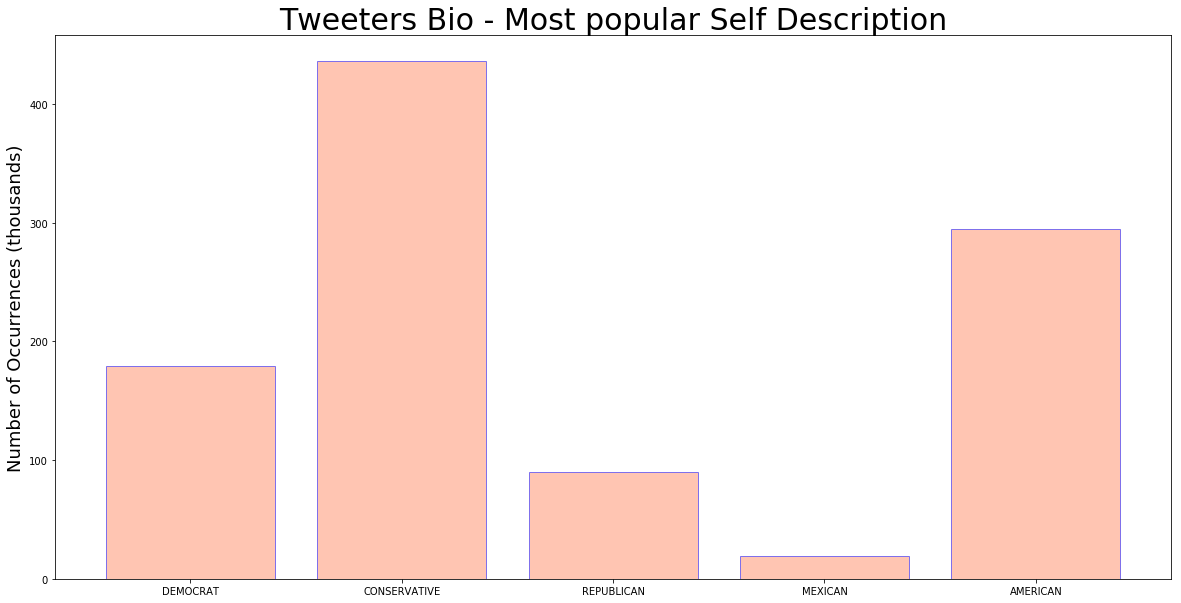

In [21]:
import matplotlib.pyplot as plt
B = {str(WORDONE):int(WORDONE_COUNT), 
     str(WORDTWO):int(WORDTWO_COUNT),
    str(WORDTHREE):int(WORDTHREE_COUNT),
    str(WORDFOUR):int(WORDFOUR_COUNT),
    str(WORDFIVE):int(WORDFIVE_COUNT)}



plt.bar(range(len(B)), list(B.values()), align='center', alpha=0.5, color=('#ff8c66'),  edgecolor='blue')

plt.xticks(range(len(B)), list(B.keys()), rotation='horizontal')
plt.title("Tweeters Bio - Most popular Self Description", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
#plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
#plt.savefig("BESPOKE", bbox_inches="tight")

exists = os.path.isfile('COMPARE.png')
if exists:
    os.remove("COMPARE.png")



plt.savefig("COMPARE")
plt.show()

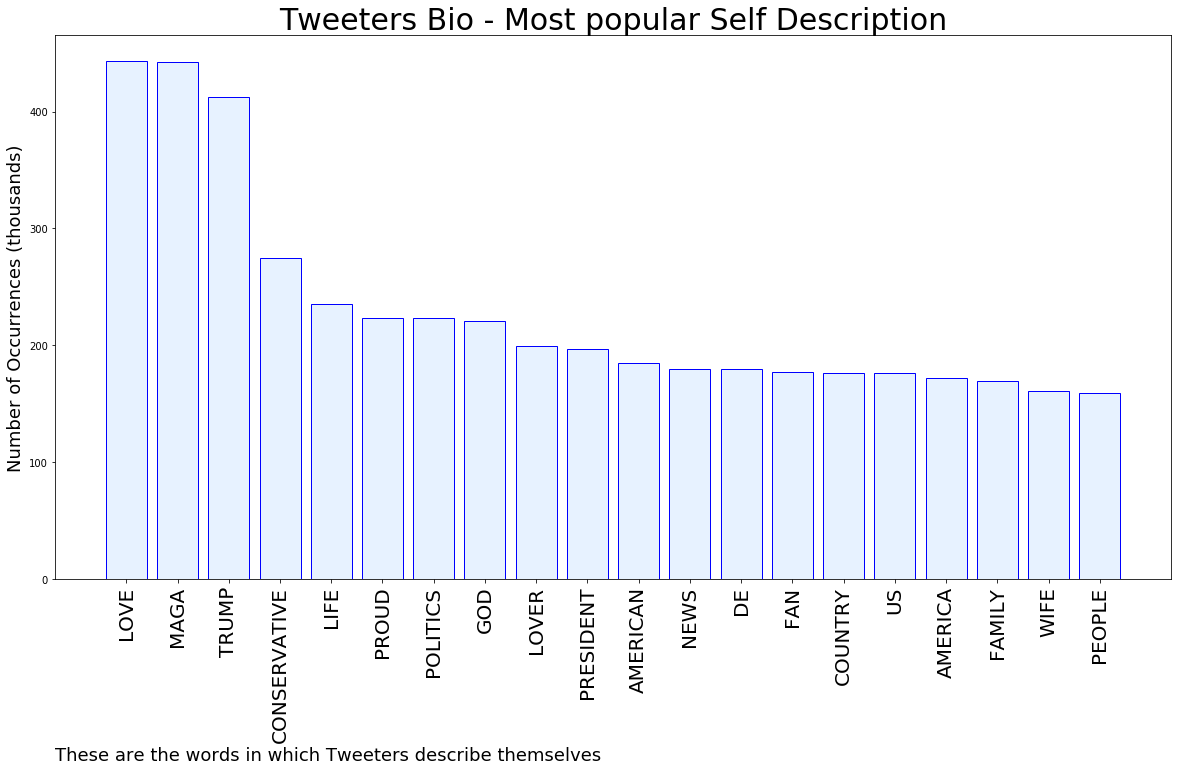

In [22]:
import matplotlib.pyplot as plt

D = top_bio_desc

plt.bar(range(len(D)), list(D.values()), align='center', color=(0.1, 0.5, 1, 0.1),  edgecolor='blue')

plt.xticks(range(len(D)), list(D.keys()), rotation='vertical', fontsize=20)
plt.title("Tweeters Bio - Most popular Self Description", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)


exists = os.path.isfile('BIO.png')
if exists:
    os.remove("BIO.png")


plt.savefig("BIO", bbox_inches="tight")
plt.show()

# SENTIMENT ANALYSIS 

The sentiment property returns a named tuple of the form Sentiment (polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

# Now the Theory
Thanks to Siraj Raval and freecode camp for the sample here

TextBlob
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

A textblob can be created in the following way (example, and not part of the original code):

example = TextBlob("Python is a high-level, general-purpose programming language.")
And tokenization can be performed by the following methods:
words: returns the words of text

usage:

example.words
sentences: returns the sentences of text

usage:

example.sentences


In [24]:
from textblob import TextBlob
import tweepy

VALUE = 'immigration'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [25]:
public_tweets = api.search(VALUE)

In [26]:
objective_tweet=0
subjective_tweet=0
negitively_subjective=0
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       subjective_tweet = subjective_tweet + 1
       print('Subjective')
    elif analysis.sentiment[0]<0:
       negitively_subjective = negitively_subjective  + 1
       print('Negatively subjective')
    else:
       objective_tweet = objective_tweet + 1
       print('objective')
    print('\n')
    
print('objective_tweets : '+str(objective_tweet))
print('subjective_tweets : '+str(subjective_tweet))
print('negitively_subjective tweets: '+str(negitively_subjective))

RT @popsnstuff: @MarshaPatriot @MAGA2ARIGHTS @POTUS @senatemajldr @GOPSenate @GOPHouse This is whats wrong with are immigration its all abo…
Sentiment(polarity=-0.5, subjectivity=0.9)
Negatively subjective


#MAGA #WWG1WGA #AmericaFirst #darktolight #Trump2020 
Congressman Doug Collins: Jerry Nadler Needs To Get Off His I… https://t.co/GTL9XkoUJk
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @andylassner: Headline of the day  https://t.co/z4gJO2XjD6
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @mitchellvii: TRUMP: "Let's build a wall."
CONGRESS: "Oh we can't do that!"

TRUMP: "Let's close the border."
CONGRESS: "Oh we can't do…
Sentiment(polarity=0.0, subjectivity=0.0)
objective


The opening reception for the CBA National Immigration Law Conference was held at the Assiniboine Park Zoo. They ha… https://t.co/jjX6SdbRQG
Sentiment(polarity=0.0, subjectivity=0.0)
objective


The T. A. Jackson plan for immigration AND emigration: no one crosses the border and lives u

# SAMPLE

In [27]:
status_array[2000]['text']

'@RashidaTlaib If the rooms are full why overfill them. We should stop admitting when there isn’t space so that peop… https://t.co/h5hyS8pit3'

# MOST REFERENCED PEOPLE

In [28]:
quote_count = 0
quoted_users = []

# USING FOLLOWING REDUCES TO ONLY IF QUOTED if status_array[current]['is_quote_status'] == True: 

for current in range(0, len(status_array)):
    """If quoted, then check mentions and append mention screen names to array"""
    
    if status_array[current]['entities']['user_mentions'] is not None:
        for y in range(0, len(status_array[current]['entities']['user_mentions'])):
            quoted_users.append(status_array[current]['entities']['user_mentions'][y]['screen_name'])

                
print("Number of times users were quoted :" + str(len(quoted_users)))
       
quoteCounter = Counter(quoted_users)
quoteCounted = OrderedDict(quoteCounter.most_common(5))


print("Most quoted users are : " + str(quoteCounted) + "\n")   
    
reference_items = list(quoteCounted.items())



Number of times users were quoted :12947
Most quoted users are : OrderedDict([('realDonaldTrump', 721), ('mitchellvii', 507), ('RVAwonk', 437), ('EricTrump', 409), ('BernieSanders', 374)])



# GOOGLE TRENDS 

In [29]:
"""
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

with open('multiTimeline.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
google =data[3:]

dates = []
values = []
for x in range(0, len(google)):
    dates.append(str(google[x][0]))
    values.append(google[x][1])
    



y_pos = np.arange(len(dates))


plt.scatter(dates, values)

plt.title('Google Trend Over time')
plt.ylabel('Popularity as % of Max')
plt.xticks(y_pos, dates, fontsize=10, rotation=30)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='Y', nbins=6)

plt.show()
"""

"\nimport csv\nimport matplotlib.pyplot as plt; plt.rcdefaults()\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nwith open('multiTimeline.csv', newline='') as csvfile:\n    data = list(csv.reader(csvfile))\ngoogle =data[3:]\n\ndates = []\nvalues = []\nfor x in range(0, len(google)):\n    dates.append(str(google[x][0]))\n    values.append(google[x][1])\n    \n\n\n\ny_pos = np.arange(len(dates))\n\n\nplt.scatter(dates, values)\n\nplt.title('Google Trend Over time')\nplt.ylabel('Popularity as % of Max')\nplt.xticks(y_pos, dates, fontsize=10, rotation=30)\nplt.locator_params(axis='x', nbins=6)\nplt.locator_params(axis='Y', nbins=6)\n\nplt.show()\n"

In [30]:
"""
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

with open('geoMap.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
google =data[3:]

places = []
values = []
for x in range(0, len(google)):
    places.append(str(google[x][0]))
    values.append(google[x][1])
    
places = places[0:5]
values = values[0:5]

# this is for plotting purpose
index = np.arange(len(places))
plt.barh(index, values)
plt.ylabel('District', fontsize=10)
plt.xlabel('Proportion Index', fontsize=10)
plt.yticks(index, places, fontsize=10, rotation=0)
plt.title('Interest by subregion')
plt.savefig("gcompare")
plt.show()

"""

'\nimport csv\nimport matplotlib.pyplot as plt; plt.rcdefaults()\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nwith open(\'geoMap.csv\', newline=\'\') as csvfile:\n    data = list(csv.reader(csvfile))\ngoogle =data[3:]\n\nplaces = []\nvalues = []\nfor x in range(0, len(google)):\n    places.append(str(google[x][0]))\n    values.append(google[x][1])\n    \nplaces = places[0:5]\nvalues = values[0:5]\n\n# this is for plotting purpose\nindex = np.arange(len(places))\nplt.barh(index, values)\nplt.ylabel(\'District\', fontsize=10)\nplt.xlabel(\'Proportion Index\', fontsize=10)\nplt.yticks(index, places, fontsize=10, rotation=0)\nplt.title(\'Interest by subregion\')\nplt.savefig("gcompare")\nplt.show()\n\n'

# SCAN A TWEET FOR A GIVEN BIO 

In [39]:
from collections import Counter, OrderedDict
#PICK ONE 

CHOSEN_BIO_WORD = 'guns'


CHOSEN_BIO_WORD = CHOSEN_BIO_WORD.upper()


TARGETARRAY = []
TARGETTWEET = ""
linecount = 0
for x in range(0, len(status_array)):
    text = str(status_array[x]['text']).upper()
    description = str(status_array[x]['user']['description']).upper()
   
    if str(description).count(str(CHOSEN_BIO_WORD)) >= 1:
        TARGETARRAY.append(status_array[x])
        TARGETTWEET = TARGETTWEET +  str(status_array[x]['text']).upper()



DISC = TARGETTWEET.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE'],x['/'],x['•'],x["I'M"],x[''],x['']

refinedTWEETS = OrderedDict(x.most_common(50))
print("Number of matching tweets: " + str(len(TARGETARRAY)))
print("Top 50 terms in their tweets: " + str(refinedTWEETS))

Number of matching tweets: 29
Top 50 terms in their tweets: OrderedDict([('IMMIGRATION', 13), ('MEXICO', 10), ('TARIFFS', 7), ('NO,', 5), ('RIGHT', 5), ('LEFT', 5), ("TRUMP'S", 5), ('AGAINST', 5), ('@MITCHELLVII:', 4), ('LAUGH', 4), ('THOSE', 4), ('SAYING', 4), ('"BAD', 4), ('IDEA?"', 4), ('OH', 4), ('DEMS', 4), ('PEOPLE', 4), ('TRUMP', 3), ('—', 3), ('MEXICO…RT', 3), ('HELP', 3), ('LAWS', 2), ('TAX', 2), ('ILLEGAL', 2), ('LAW', 2), ('@JOYCEWHITEVANCE:', 2), ('HUGE.', 2), ('REPUBLICANS,', 2), ('OFTEN', 2), ('ALLEGE', 2), ('VOTER', 2), ('FRAUD', 2), ('DESPITE', 2), ('ABSENCE', 2), ('ANY', 2), ('EVIDENCE', 2), ('BEYOND', 2), ('RARE,', 2), ('ISOLATED', 2), ('TARIFF', 2), ('@NYTIMES:', 2), ('FACILITY', 2), ('EL', 2), ('PASO,', 2), ('INVESTIGATORS', 2), ('FOUND', 2), ('155', 2), ('CELL', 2), ('SUPPOSED', 2), ('HOLD', 2)])


# SCAN BIO FOR GIVEN TWEET

In [40]:
from collections import Counter, OrderedDict
#PICK ONE 

CHOSEN_TWEET_WORD = 'deport'


CHOSEN_TWEET_WORD = CHOSEN_TWEET_WORD.upper()


TARGETARRAY = []
TARGETBIO = ""
linecount = 0
for x in range(0, len(status_array)):
    text = str(status_array[x]['text']).upper()
    description = str(status_array[x]['user']['description']).upper()
   
    if str(text).count(str(CHOSEN_TWEET_WORD)) >= 1:
        TARGETARRAY.append(status_array[x])
        TARGETBIO = TARGETBIO + str(status_array[x]['user']['description']).upper()



DISC = TARGETBIO.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE'],x['/'],x['•'],x["I'M"],x[''],x['']

refinedBio = OrderedDict(x.most_common(50))
print("Number of matching tweets: " + str(len(TARGETARRAY)))
print("Top 50 terms in their bio: " + str(refinedBio))

Number of matching tweets: 27
Top 50 terms in their bio: OrderedDict([('HUMAN', 3), ('RIGHTS', 2), ('PROJECT', 2), ('NEED', 2), ('CHINA.', 2), ('USA', 2), ('RETIRED', 2), ('FAN', 2), ('BEAUTIFUL', 2), ('END', 2), ('EQUALITY', 2), ('EL', 2), ('PAÍS', 2), ('QUE', 2), ('Y', 2), ('NEWS', 2), ('ARCHIVE', 1), ('VIOLATIONS,', 1), ('RACISM', 1), ('DISCRIMINATION.', 1), ('TÜRKÇE', 1), ('@UTANCGUNLUGU', 1), ('@BOSPHORUSGLOBALHTTPS://T.CO/VJSPWITVW4', 1), ('TECHNICAL', 1), ('LEAD.', 1), ('"LIKE"S', 1), ('LATER', 1), ('READING', 1), ('FOLLOW', 1), ('UP.', 1), ("RETWEET'S", 1), ('"INTERESTING,"', 1), ('ENDORSEMENTS.DUTERTE:', 1), ('“I', 1), ('THAN', 1), ('ANYBODY', 1), ('ELSE', 1), ('POINT,', 1), ('SIMPLY', 1), ('LOVE', 1), ('XI', 1), ('JINPING."I', 1), ('BROUGHT', 1), ('WHEN', 1), ('LITTLE.', 1), ('MIGHT', 1), ('RUSSIA,', 1), ('ENGLAND', 1), ('AUSTRALIA.', 1), ('HATE', 1)])


# LINK BIO AND TWEET

In [41]:
print(large_top_tweets)
print("")
print("bio")
print(large_bio_desc)

OrderedDict([('MEXICO', 1631), ('TRUMP', 1261), ('TARIFFS', 936), ('US', 829), ('PRESIDENT', 804), ('DEMS', 794), ('PEOPLE', 743), ('ASYLUM', 671), ('ILLEGAL', 657), ('BORDER', 635), ('AGAINST', 503), ('@MITCHELLVII:', 501), ("TRUMP'S", 496), ('MEXICO…RT', 491), ('LAW', 477), ('SEEKERS', 474), ('MEDIA', 456), ('SAYING', 452), ('DESPITE', 450), ('FEDERAL', 449), ('LEFT', 448), ('BLOCK', 447), ('OH', 442), ('CBP', 440), ('CHIEF', 440), ('OFFERED', 439), ('@RVAWONK:', 437), ('PREEMPTIVE', 437), ('PARDON', 437), ('VIOLATED', 437), ('ANY', 436), ('LAUGH', 426), ('"BAD', 426), ('IDEA?"', 426), ('UNITED', 411), ('INCREASING', 408), ('FEW', 408), ('MENTION', 408), ('TOTAL', 406), ('JOKE', 406), ('FAIL', 402), ('DISCUSS', 401), ('CENTS', 401), ('$200', 401), ('@ERICTRUMP:', 400), ('“AVOCADO’S”', 400), ('POTENTIALLY', 400), ('LAWS', 399), ('STATES', 379), ('REPUBLICANS', 354)])

bio
OrderedDict([('LOVE', 443), ('MAGA', 442), ('TRUMP', 412), ('CONSERVATIVE', 275), ('LIFE', 235), ('PROUD', 223), (

In [42]:
#PICK TWO OR 

CHOSEN_WORD_ONE = 'deport'
BIO_CHOSEN_WORD_ONE = 'conservative'



CHOSEN_WORD_ONE = CHOSEN_WORD_ONE.upper()
BIO_CHOSEN_WORD_ONE = BIO_CHOSEN_WORD_ONE.upper()




TARGETARRAY = []
linecount = 0
for x in range(0, len(status_array)):
    text = str(status_array[x]['text']).upper()
    description = str(status_array[x]['user']['description']).upper()
   
    if str(text).count(str(CHOSEN_WORD_ONE)) >= 1 and str(description).count(str(BIO_CHOSEN_WORD_ONE)) >= 1:
        TARGETARRAY.append(status_array[x])


match_percentage =  (len(TARGETARRAY)/len(status_array)) * 100
match_percentage = round(match_percentage,2)
print("No of matches : " + str(match_percentage) + "%" )    
print(TARGETARRAY[0]['text'])
print("")
print('Bio: ')
print(TARGETARRAY[0]['user']['description'])

No of matches : 0.01%
RT @BobMakenzie1: @themadsloth @AndrewScheer @CPC_HQ 
Time for new policy on illegal immigration &amp; human trafficking. 
Immediately deport i…

Bio: 
Conservative views - happily Married 50+ years, Retired REALTOR. 2 x Cancer survivor, avid golfer and Alpine skier. I enjoy a good Scotch and I like beer 🍺.


In [43]:
status_array[1]['user']['created_at']

'Sat May 07 19:25:16 +0000 2016'

# COUNT NEW USERS    

In [44]:
import time
from datetime import datetime, timedelta
present = datetime.now()

timerange = 10



newcount = 0

for x in range(0, len(status_array)):
    created_at = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(status_array[x]['user']['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
    then = datetime.strptime(created_at, "%Y-%m-%d %H:%M:%S")
    delta = datetime.now() - then
    if delta.days < timerange:
        newcount = newcount + 1
        #print(status_array[x]['user']['created_at'])
        #print(created_at)
        #print(delta)

        
percentnewcount = (newcount/len(status_array)) * 100
percentnewcount = round(percentnewcount,2)



print("No of Profiles newer than " + str(timerange) + " days are : " + str(percentnewcount) + "%")


No of Profiles newer than 10 days are : 0.95%


# COUNT FOLLOWERS

In [45]:
count = 0 
maxcount = 0
followercount = 10
maxfollowercount = 1000000

for x in range(0, len(status_array)):
    if status_array[x]['user']['followers_count'] < followercount:
        count = count + 1 
        
    if status_array[x]['user']['followers_count'] > maxfollowercount:
        maxcount = maxcount + 1 
    
percentcount = (count / len(status_array)) * 100
percentcount = round(percentcount,2)


maxpercentcount = (maxcount / len(status_array)) * 100
maxpercentcount = round(maxpercentcount,2)

print("No of people with less than " + str(followercount) + " followers :" + str(percentcount) + "%")
print("No of people with more than " + str(maxfollowercount) + " followers :" + str(maxpercentcount) + "%")

No of people with less than 10 followers :3.81%
No of people with more than 1000000 followers :0.09%


# MOST RETWEETED

In [80]:
import operator

retweet_count = []

for x in range(0, len(status_array)):
    retweet_count.append(status_array[x]['retweet_count'])

# Requires operator lib    
index, value = max(enumerate(retweet_count), key=operator.itemgetter(1))

if status_array[index]['retweet_count'] != value:
    print('something went wrong')
    
print("The most retweeted user is: " + str(status_array[index]['user']['screen_name'])) 
print('Created on :' + str(status_array[index]['created_at']))
print("Their tweet was : " + str(status_array[index]['text']))
print("No of retweets: " + str(value))

The most retweeted user is: JackDeskins
Created on :Sat Jun 01 18:08:51 +0000 2019
Their tweet was : RT @adamcbest: Conservatives on abortion: We want a ban!

Conservatives on gay marriage: We want a ban!

Conservatives on immigration: We w…
No of retweets: 78191


# METRICS FOR USE

In [81]:
print("Sample 1 :" + str(status_array[1000]['text']) + "\n")
print("Sample 2 :" + str(status_array[4000]['text']) + "\n")
print("Sample 3 :" + str(status_array[7000]['text']) + "\n")

print("#1 Most tweeted to : " )
print(str(print(reference_items[0][0])))
print("#2 Most tweeted to : " )
print(str(print(reference_items[1][0])))
print("#3 Most tweeted to : ")
print(str(print(reference_items[2][0])))
print('')

print('NewProfiles (less than 10 days) : ' + str(str(percentnewcount)) + "%")
print("No of people with less than " + str(followercount) + " followers :" + str(percentcount) + "%")
print("No of people with more than " + str(maxfollowercount) + " followers :" + str(maxpercentcount) + "%")
print("Printing top tweets")
print('')
print(top_tweets)


print("The most retweeted user is: " + str(status_array[index]['user']['screen_name'])) 
print("Their tweet was : " + str(status_array[index]['text']))
print("No of retweets: " + str(value))

Sample 1 :RT @MaximeBernier: Listen to my interview with Evan Solomon (at 11 min.) We’re discussing immigration, PPC candidates and abortion. 
https:…

Sample 2 :Bolton and Israel lobby will end up pushing @realDonaldTrump into war, especially when he sees that he can't win th… https://t.co/dGrDTCbhH0

Sample 3 :RT @mitchellvii: Can I just laugh at those on the right and the left saying Trump's tariffs against Mexico are a "bad idea?"

Oh no, Mexico…

#1 Most tweeted to : 
realDonaldTrump
None
#2 Most tweeted to : 
mitchellvii
None
#3 Most tweeted to : 
RVAwonk
None

NewProfiles (less than 10 days) : 0.95%
No of people with less than 10 followers :3.81%
No of people with more than 1000000 followers :0.09%
Printing top tweets

OrderedDict([('MEXICO', 1631), ('TRUMP', 1261), ('TARIFFS', 936), ('US', 829), ('PRESIDENT', 804), ('DEMS', 794), ('PEOPLE', 743), ('ASYLUM', 671), ('ILLEGAL', 657), ('BORDER', 635), ('AGAINST', 503), ('@MITCHELLVII:', 501), ("TRUMP'S", 496), ('MEXICO…RT', 491), (

# PRINT OUT

In [18]:
#PRINT FORMAT
print('<div class="alert alert-block alert-warning">' + str(status_array[10]['text']) + '</div><div class="alert alert-block alert-success">' + str(status_array[100]['text']) + '</div><div class="alert alert-block alert-info">' + str(status_array[70]['text']) + '</div>')

<div class="alert alert-block alert-warning">RT @realDonaldTrump: On June 10th, the United States will impose a 5% Tariff on all goods coming into our Country from Mexico, until such t…</div><div class="alert alert-block alert-success">If we #Brexit will the UK follow suit? #socialmedia #visa #immigration  https://t.co/Txk3cHXwf5</div><div class="alert alert-block alert-info">RT @hashemiquebec: @Monique_Sauve S'il vous plaît ne détruisez pas l'espoir de nos enfants...
 #Quebec_immigration_injustice, @ SJB_CAQ htt…</div>


In [22]:
print('| Metric | Value |')
print('| ------------- | ------------- |')
print('| #1 Most tweeted to  | **' + str(reference_items[0][0]) + '** |')
print('| #2 Most tweeted to  | **' + str(reference_items[1][0]) + '** |')
print('| #3 Most tweeted to  | **' + str(reference_items[2][0]) + '** |')
print('| NewProfiles (less than 10 days) | ' + str(str(percentnewcount)) + '%  |')
print('| Tweeters with < ' + str(followercount) + ' followers  | ' + str(percentcount) + '%|')
print('| Tweeters with > ' + str(maxfollowercount) + ' followers  | '  + str(maxpercentcount) + '%  |')

| Metric | Value |
| ------------- | ------------- |
| #1 Most tweeted to  | **realDonaldTrump** |
